In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, "../")

In [3]:
import torch
import torch.nn as nn
from torchsummary import summary

from data.input_transforms import InputTransform
from data.cifar import CIFAR
from data.dataloader import get_dataloader
from models.optimizer import optimizer, scheduler
from networks.twolayernet import TwolayerNet
from networks.convnet import ConvNet
from utils.viz import plot_multiple_quantities_by_time
from main import train, evaluate

In [4]:
def experiment(train_transforms, valid_transforms, network, num_epochs, batch_size, opt_args, sch_args=None):
    
    print(train_transforms)
    print(num_epochs)
    print(batch_size)
    print(opt_args)
    print(sch_args)
    
    # define the datasets
    train_transform = InputTransform(train_transforms)
    valid_transform = InputTransform(valid_transforms)
    train_dataset = CIFAR(root="../datasets/CIFAR-10/", mode="train", transform=train_transform)
    valid_dataset = CIFAR(root="../datasets/CIFAR-10/", mode="valid", transform=valid_transform)

    # obtain the train dataloader
    train_loader = get_dataloader(train_dataset, train=True, batch_size=batch_size, num_workers=0)
    valid_loader = get_dataloader(valid_dataset, train=False, batch_size=batch_size, num_workers=0)
    
    if network == "tln":
        net = TwolayerNet(num_inputs=3 * 32 * 32, num_hidden=512, num_classes=10)
    elif network == "cnn":
        net = ConvNet(in_channels=3, num_classes=10)
    else:
        raise ValueError()
    arch = type(net).__name__

    # define the optimizer and scheduler
    opt = optimizer(model_params=net.parameters(), **opt_args)
    sch = None
    if sch_args is not None:
        sch = scheduler(opt=opt, **sch_args)

    # define the loss function
    loss_fn = nn.CrossEntropyLoss()

    # train the model
    epochs, train_losses, train_metrics, valid_losses, valid_metrics = train(
        net, loss_fn, train_loader, valid_loader, num_epochs=num_epochs, opt=opt, sch=sch,
    )

    # plot training curves
    plot_multiple_quantities_by_time(
        quantities=[train_losses["loss"], valid_losses["loss"]],
        time=epochs,
        labels=["Train", "Validation"],
        title=f"{arch} Loss curves",
        show=True,
        save=True,
        save_path="../results/tln_best_plot_best.png",
        ylabel="Loss",
    )
    plot_multiple_quantities_by_time(
        quantities=[train_metrics["accuracy"], valid_metrics["accuracy"]],
        time=epochs,
        labels=["Train", "Validation"],
        title=f"{arch} Accuracy curves",
        show=True,
        save=True,
        save_path="../results/tln_accu_plot_best.png",
        ylabel="Accuracy",
    )
    
    return net, loss_fn

[{'name': 'ToTensor', 'args': {}}, {'name': 'Normalize', 'args': {'mean': (0.5, 0.5, 0.5), 'std': (0.5, 0.5, 0.5)}}, {'name': 'RandomAffine', 'args': {'degrees': 10, 'translate': (0.1, 0.1), 'scale': (0.8, 1.2)}}, {'name': 'RandomHorizontalFlip', 'args': {'p': 0.5}}, {'name': 'GaussianBlur', 'args': {'kernel_size': 3}}]
200
128
{'name': 'Adam', 'lr': 0.0001}
{'name': 'MultiStepLR', 'milestones': [50, 100, 150], 'gamma': 0.5}
Selecting 40000 for train.
Selecting 10000 for valid.


Evaluate: Epoch [1/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 204.42it/s]                                              


VALID 	: Summary: Loss: 1.6419 Accuracy: 0.4175
TRAIN 	: Summary: Loss: 1.8627 Accuracy: 0.3408


Evaluate: Epoch [2/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.27it/s]                                              


VALID 	: Summary: Loss: 1.5871 Accuracy: 0.4397
TRAIN 	: Summary: Loss: 1.7213 Accuracy: 0.3937


Evaluate: Epoch [3/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.44it/s]                                              


VALID 	: Summary: Loss: 1.5339 Accuracy: 0.4582
TRAIN 	: Summary: Loss: 1.6705 Accuracy: 0.4124


Evaluate: Epoch [4/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 213.61it/s]                                              


VALID 	: Summary: Loss: 1.4988 Accuracy: 0.4717
TRAIN 	: Summary: Loss: 1.6301 Accuracy: 0.4285


Evaluate: Epoch [5/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 203.00it/s]                                              


VALID 	: Summary: Loss: 1.4869 Accuracy: 0.4742
TRAIN 	: Summary: Loss: 1.6039 Accuracy: 0.4396


Evaluate: Epoch [6/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 201.07it/s]                                              


VALID 	: Summary: Loss: 1.4661 Accuracy: 0.4797
TRAIN 	: Summary: Loss: 1.5873 Accuracy: 0.4413


Evaluate: Epoch [7/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 200.72it/s]                                              


VALID 	: Summary: Loss: 1.4446 Accuracy: 0.4894
TRAIN 	: Summary: Loss: 1.5659 Accuracy: 0.4519


Evaluate: Epoch [8/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 212.88it/s]                                              


VALID 	: Summary: Loss: 1.4339 Accuracy: 0.4960
TRAIN 	: Summary: Loss: 1.5530 Accuracy: 0.4572


Evaluate: Epoch [9/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.70it/s]                                              


VALID 	: Summary: Loss: 1.4212 Accuracy: 0.4985
TRAIN 	: Summary: Loss: 1.5349 Accuracy: 0.4640


Evaluate: Epoch [10/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.28it/s]                                             


VALID 	: Summary: Loss: 1.3979 Accuracy: 0.5065
TRAIN 	: Summary: Loss: 1.5257 Accuracy: 0.4677


Evaluate: Epoch [11/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 195.02it/s]                                             


VALID 	: Summary: Loss: 1.3925 Accuracy: 0.5036
TRAIN 	: Summary: Loss: 1.5166 Accuracy: 0.4693


Evaluate: Epoch [12/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.35it/s]                                             


VALID 	: Summary: Loss: 1.3877 Accuracy: 0.5102
TRAIN 	: Summary: Loss: 1.5049 Accuracy: 0.4748


Evaluate: Epoch [13/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.04it/s]                                             


VALID 	: Summary: Loss: 1.3824 Accuracy: 0.5122
TRAIN 	: Summary: Loss: 1.4977 Accuracy: 0.4763


Evaluate: Epoch [14/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.82it/s]                                             


VALID 	: Summary: Loss: 1.3731 Accuracy: 0.5211
TRAIN 	: Summary: Loss: 1.4866 Accuracy: 0.4791


Evaluate: Epoch [15/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 206.28it/s]                                             


VALID 	: Summary: Loss: 1.3537 Accuracy: 0.5209
TRAIN 	: Summary: Loss: 1.4795 Accuracy: 0.4847


Evaluate: Epoch [16/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 197.01it/s]                                             


VALID 	: Summary: Loss: 1.3488 Accuracy: 0.5233
TRAIN 	: Summary: Loss: 1.4745 Accuracy: 0.4852


Evaluate: Epoch [17/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 203.51it/s]                                             


VALID 	: Summary: Loss: 1.3523 Accuracy: 0.5211
TRAIN 	: Summary: Loss: 1.4607 Accuracy: 0.4901


Evaluate: Epoch [18/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.01it/s]                                             


VALID 	: Summary: Loss: 1.3443 Accuracy: 0.5272
TRAIN 	: Summary: Loss: 1.4596 Accuracy: 0.4903


Evaluate: Epoch [19/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.65it/s]                                             


VALID 	: Summary: Loss: 1.3304 Accuracy: 0.5235
TRAIN 	: Summary: Loss: 1.4516 Accuracy: 0.4931


Evaluate: Epoch [20/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.79it/s]                                             


VALID 	: Summary: Loss: 1.3329 Accuracy: 0.5259
TRAIN 	: Summary: Loss: 1.4417 Accuracy: 0.4966


Evaluate: Epoch [21/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.09it/s]                                             


VALID 	: Summary: Loss: 1.3278 Accuracy: 0.5321
TRAIN 	: Summary: Loss: 1.4406 Accuracy: 0.4983


Evaluate: Epoch [22/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 209.57it/s]                                             


VALID 	: Summary: Loss: 1.3203 Accuracy: 0.5352
TRAIN 	: Summary: Loss: 1.4332 Accuracy: 0.4985


Evaluate: Epoch [23/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 200.60it/s]                                             


VALID 	: Summary: Loss: 1.3264 Accuracy: 0.5283
TRAIN 	: Summary: Loss: 1.4332 Accuracy: 0.4995


Evaluate: Epoch [24/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 168.02it/s]                                             


VALID 	: Summary: Loss: 1.3103 Accuracy: 0.5404
TRAIN 	: Summary: Loss: 1.4232 Accuracy: 0.5027


Evaluate: Epoch [25/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.80it/s]                                             


VALID 	: Summary: Loss: 1.3090 Accuracy: 0.5412
TRAIN 	: Summary: Loss: 1.4198 Accuracy: 0.5050


Evaluate: Epoch [26/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 204.54it/s]                                             


VALID 	: Summary: Loss: 1.3046 Accuracy: 0.5388
TRAIN 	: Summary: Loss: 1.4155 Accuracy: 0.5051


Evaluate: Epoch [27/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 213.71it/s]                                             


VALID 	: Summary: Loss: 1.2977 Accuracy: 0.5439
TRAIN 	: Summary: Loss: 1.4098 Accuracy: 0.5091


Evaluate: Epoch [28/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 219.26it/s]                                             


VALID 	: Summary: Loss: 1.2932 Accuracy: 0.5458
TRAIN 	: Summary: Loss: 1.4016 Accuracy: 0.5106


Evaluate: Epoch [29/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 202.13it/s]                                             


VALID 	: Summary: Loss: 1.2868 Accuracy: 0.5445
TRAIN 	: Summary: Loss: 1.4018 Accuracy: 0.5084


Evaluate: Epoch [30/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 190.42it/s]                                             


VALID 	: Summary: Loss: 1.2854 Accuracy: 0.5452
TRAIN 	: Summary: Loss: 1.3997 Accuracy: 0.5120


Evaluate: Epoch [31/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 197.57it/s]                                             


VALID 	: Summary: Loss: 1.2766 Accuracy: 0.5536
TRAIN 	: Summary: Loss: 1.3887 Accuracy: 0.5142


Evaluate: Epoch [32/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.68it/s]                                             


VALID 	: Summary: Loss: 1.3021 Accuracy: 0.5421
TRAIN 	: Summary: Loss: 1.3855 Accuracy: 0.5156


Evaluate: Epoch [33/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 161.94it/s]                                             


VALID 	: Summary: Loss: 1.2675 Accuracy: 0.5540
TRAIN 	: Summary: Loss: 1.3840 Accuracy: 0.5169


Evaluate: Epoch [34/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 190.11it/s]                                             


VALID 	: Summary: Loss: 1.2791 Accuracy: 0.5511
TRAIN 	: Summary: Loss: 1.3763 Accuracy: 0.5215


Evaluate: Epoch [35/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 205.56it/s]                                             


VALID 	: Summary: Loss: 1.2690 Accuracy: 0.5574
TRAIN 	: Summary: Loss: 1.3793 Accuracy: 0.5181


Evaluate: Epoch [36/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 204.10it/s]                                             


VALID 	: Summary: Loss: 1.2662 Accuracy: 0.5547
TRAIN 	: Summary: Loss: 1.3712 Accuracy: 0.5220


Evaluate: Epoch [37/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 203.28it/s]                                             


VALID 	: Summary: Loss: 1.2626 Accuracy: 0.5572
TRAIN 	: Summary: Loss: 1.3706 Accuracy: 0.5186


Evaluate: Epoch [38/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 206.72it/s]                                             


VALID 	: Summary: Loss: 1.2651 Accuracy: 0.5546
TRAIN 	: Summary: Loss: 1.3686 Accuracy: 0.5236


Evaluate: Epoch [39/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 195.39it/s]                                             


VALID 	: Summary: Loss: 1.2664 Accuracy: 0.5546
TRAIN 	: Summary: Loss: 1.3673 Accuracy: 0.5222


Evaluate: Epoch [40/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 215.87it/s]                                             


VALID 	: Summary: Loss: 1.2563 Accuracy: 0.5613
TRAIN 	: Summary: Loss: 1.3579 Accuracy: 0.5254


Evaluate: Epoch [41/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 202.59it/s]                                             


VALID 	: Summary: Loss: 1.2581 Accuracy: 0.5570
TRAIN 	: Summary: Loss: 1.3573 Accuracy: 0.5236


Evaluate: Epoch [42/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 201.58it/s]                                             


VALID 	: Summary: Loss: 1.2527 Accuracy: 0.5600
TRAIN 	: Summary: Loss: 1.3578 Accuracy: 0.5279


Evaluate: Epoch [43/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 201.92it/s]                                             


VALID 	: Summary: Loss: 1.2524 Accuracy: 0.5571
TRAIN 	: Summary: Loss: 1.3530 Accuracy: 0.5285


Evaluate: Epoch [44/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 211.05it/s]                                             


VALID 	: Summary: Loss: 1.2562 Accuracy: 0.5638
TRAIN 	: Summary: Loss: 1.3515 Accuracy: 0.5295


Evaluate: Epoch [45/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 203.50it/s]                                             


VALID 	: Summary: Loss: 1.2387 Accuracy: 0.5661
TRAIN 	: Summary: Loss: 1.3495 Accuracy: 0.5284


Evaluate: Epoch [46/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 195.03it/s]                                             


VALID 	: Summary: Loss: 1.2499 Accuracy: 0.5600
TRAIN 	: Summary: Loss: 1.3400 Accuracy: 0.5333


Evaluate: Epoch [47/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 206.54it/s]                                             


VALID 	: Summary: Loss: 1.2383 Accuracy: 0.5659
TRAIN 	: Summary: Loss: 1.3437 Accuracy: 0.5325


Evaluate: Epoch [48/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 184.33it/s]                                             


VALID 	: Summary: Loss: 1.2341 Accuracy: 0.5674
TRAIN 	: Summary: Loss: 1.3365 Accuracy: 0.5324


Evaluate: Epoch [49/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 205.52it/s]                                             


VALID 	: Summary: Loss: 1.2350 Accuracy: 0.5615
TRAIN 	: Summary: Loss: 1.3344 Accuracy: 0.5336


Evaluate: Epoch [50/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 179.73it/s]                                             


VALID 	: Summary: Loss: 1.2351 Accuracy: 0.5666
TRAIN 	: Summary: Loss: 1.3351 Accuracy: 0.5344


Evaluate: Epoch [51/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 194.51it/s]                                             


VALID 	: Summary: Loss: 1.2158 Accuracy: 0.5759
TRAIN 	: Summary: Loss: 1.3171 Accuracy: 0.5410


Evaluate: Epoch [52/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 199.66it/s]                                             


VALID 	: Summary: Loss: 1.2180 Accuracy: 0.5760
TRAIN 	: Summary: Loss: 1.3148 Accuracy: 0.5438


Evaluate: Epoch [53/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 179.02it/s]                                             


VALID 	: Summary: Loss: 1.2199 Accuracy: 0.5722
TRAIN 	: Summary: Loss: 1.3111 Accuracy: 0.5422


Evaluate: Epoch [54/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 188.31it/s]                                             


VALID 	: Summary: Loss: 1.2154 Accuracy: 0.5771
TRAIN 	: Summary: Loss: 1.3116 Accuracy: 0.5437


Evaluate: Epoch [55/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.38it/s]                                             


VALID 	: Summary: Loss: 1.2056 Accuracy: 0.5790
TRAIN 	: Summary: Loss: 1.3099 Accuracy: 0.5439


Evaluate: Epoch [56/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.11it/s]                                             


VALID 	: Summary: Loss: 1.2082 Accuracy: 0.5791
TRAIN 	: Summary: Loss: 1.3069 Accuracy: 0.5460


Evaluate: Epoch [57/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 182.97it/s]                                             


VALID 	: Summary: Loss: 1.2042 Accuracy: 0.5778
TRAIN 	: Summary: Loss: 1.3078 Accuracy: 0.5444


Evaluate: Epoch [58/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 191.55it/s]                                             


VALID 	: Summary: Loss: 1.2131 Accuracy: 0.5753
TRAIN 	: Summary: Loss: 1.2979 Accuracy: 0.5470


Evaluate: Epoch [59/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 195.67it/s]                                             


VALID 	: Summary: Loss: 1.2143 Accuracy: 0.5755
TRAIN 	: Summary: Loss: 1.3042 Accuracy: 0.5476


Evaluate: Epoch [60/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 169.14it/s]                                             


VALID 	: Summary: Loss: 1.2030 Accuracy: 0.5773
TRAIN 	: Summary: Loss: 1.3008 Accuracy: 0.5500


Evaluate: Epoch [61/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 196.36it/s]                                             


VALID 	: Summary: Loss: 1.2061 Accuracy: 0.5789
TRAIN 	: Summary: Loss: 1.3056 Accuracy: 0.5464


Evaluate: Epoch [62/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 203.43it/s]                                             


VALID 	: Summary: Loss: 1.2007 Accuracy: 0.5806
TRAIN 	: Summary: Loss: 1.2994 Accuracy: 0.5478


Evaluate: Epoch [63/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 198.89it/s]                                             


VALID 	: Summary: Loss: 1.2031 Accuracy: 0.5782
TRAIN 	: Summary: Loss: 1.3021 Accuracy: 0.5473


Evaluate: Epoch [64/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 198.96it/s]                                             


VALID 	: Summary: Loss: 1.1994 Accuracy: 0.5823
TRAIN 	: Summary: Loss: 1.2958 Accuracy: 0.5478


Evaluate: Epoch [65/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 198.60it/s]                                             


VALID 	: Summary: Loss: 1.1921 Accuracy: 0.5839
TRAIN 	: Summary: Loss: 1.2967 Accuracy: 0.5464


Evaluate: Epoch [66/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 207.11it/s]                                             


VALID 	: Summary: Loss: 1.2055 Accuracy: 0.5770
TRAIN 	: Summary: Loss: 1.2951 Accuracy: 0.5496


Evaluate: Epoch [67/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 202.24it/s]                                             


VALID 	: Summary: Loss: 1.1988 Accuracy: 0.5809
TRAIN 	: Summary: Loss: 1.2920 Accuracy: 0.5528


Evaluate: Epoch [68/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 201.86it/s]                                             


VALID 	: Summary: Loss: 1.1924 Accuracy: 0.5817
TRAIN 	: Summary: Loss: 1.2932 Accuracy: 0.5514


Evaluate: Epoch [69/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 201.08it/s]                                             


VALID 	: Summary: Loss: 1.1941 Accuracy: 0.5821
TRAIN 	: Summary: Loss: 1.2923 Accuracy: 0.5500


Evaluate: Epoch [70/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 185.79it/s]                                             


VALID 	: Summary: Loss: 1.1926 Accuracy: 0.5851
TRAIN 	: Summary: Loss: 1.2886 Accuracy: 0.5514


Evaluate: Epoch [71/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 210.11it/s]                                             


VALID 	: Summary: Loss: 1.1898 Accuracy: 0.5831
TRAIN 	: Summary: Loss: 1.2913 Accuracy: 0.5494


Evaluate: Epoch [72/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 204.42it/s]                                             


VALID 	: Summary: Loss: 1.1845 Accuracy: 0.5875
TRAIN 	: Summary: Loss: 1.2853 Accuracy: 0.5552


Evaluate: Epoch [73/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 203.02it/s]                                             


VALID 	: Summary: Loss: 1.1964 Accuracy: 0.5805
TRAIN 	: Summary: Loss: 1.2853 Accuracy: 0.5522


Evaluate: Epoch [74/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 205.49it/s]                                             


VALID 	: Summary: Loss: 1.1894 Accuracy: 0.5836
TRAIN 	: Summary: Loss: 1.2826 Accuracy: 0.5539


Evaluate: Epoch [75/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 189.51it/s]                                             


VALID 	: Summary: Loss: 1.1897 Accuracy: 0.5839
TRAIN 	: Summary: Loss: 1.2839 Accuracy: 0.5572


Evaluate: Epoch [76/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 208.79it/s]                                             


VALID 	: Summary: Loss: 1.1891 Accuracy: 0.5855
TRAIN 	: Summary: Loss: 1.2827 Accuracy: 0.5534


Evaluate: Epoch [77/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 199.81it/s]                                             


VALID 	: Summary: Loss: 1.1882 Accuracy: 0.5837
TRAIN 	: Summary: Loss: 1.2816 Accuracy: 0.5537


Evaluate: Epoch [78/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 199.90it/s]                                             


VALID 	: Summary: Loss: 1.1808 Accuracy: 0.5876
TRAIN 	: Summary: Loss: 1.2832 Accuracy: 0.5554


Evaluate: Epoch [79/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 200.14it/s]                                             


VALID 	: Summary: Loss: 1.1798 Accuracy: 0.5839
TRAIN 	: Summary: Loss: 1.2775 Accuracy: 0.5541


Evaluate: Epoch [80/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 202.54it/s]                                             


VALID 	: Summary: Loss: 1.1792 Accuracy: 0.5916
TRAIN 	: Summary: Loss: 1.2770 Accuracy: 0.5532


Evaluate: Epoch [81/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 228.08it/s]                                             


VALID 	: Summary: Loss: 1.1757 Accuracy: 0.5883
TRAIN 	: Summary: Loss: 1.2800 Accuracy: 0.5562


Evaluate: Epoch [82/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 250.50it/s]                                             


VALID 	: Summary: Loss: 1.1827 Accuracy: 0.5857
TRAIN 	: Summary: Loss: 1.2790 Accuracy: 0.5550


Evaluate: Epoch [83/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 242.91it/s]                                             


VALID 	: Summary: Loss: 1.1866 Accuracy: 0.5853
TRAIN 	: Summary: Loss: 1.2785 Accuracy: 0.5558


Evaluate: Epoch [84/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 256.62it/s]                                             


VALID 	: Summary: Loss: 1.1766 Accuracy: 0.5883
TRAIN 	: Summary: Loss: 1.2708 Accuracy: 0.5586


Evaluate: Epoch [85/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 226.36it/s]                                             


VALID 	: Summary: Loss: 1.1846 Accuracy: 0.5895
TRAIN 	: Summary: Loss: 1.2713 Accuracy: 0.5579


Evaluate: Epoch [86/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 243.28it/s]                                             


VALID 	: Summary: Loss: 1.1788 Accuracy: 0.5903
TRAIN 	: Summary: Loss: 1.2711 Accuracy: 0.5599


Evaluate: Epoch [87/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 250.92it/s]                                             


VALID 	: Summary: Loss: 1.1820 Accuracy: 0.5885
TRAIN 	: Summary: Loss: 1.2679 Accuracy: 0.5579


Evaluate: Epoch [88/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 244.44it/s]                                             


VALID 	: Summary: Loss: 1.1778 Accuracy: 0.5909
TRAIN 	: Summary: Loss: 1.2653 Accuracy: 0.5587


Evaluate: Epoch [89/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 234.90it/s]                                             


VALID 	: Summary: Loss: 1.1803 Accuracy: 0.5902
TRAIN 	: Summary: Loss: 1.2704 Accuracy: 0.5556


Evaluate: Epoch [90/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 256.91it/s]                                             


VALID 	: Summary: Loss: 1.1786 Accuracy: 0.5904
TRAIN 	: Summary: Loss: 1.2670 Accuracy: 0.5592


Evaluate: Epoch [91/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 238.53it/s]                                             


VALID 	: Summary: Loss: 1.1796 Accuracy: 0.5880
TRAIN 	: Summary: Loss: 1.2689 Accuracy: 0.5607


Evaluate: Epoch [92/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 262.39it/s]                                             


VALID 	: Summary: Loss: 1.1721 Accuracy: 0.5908
TRAIN 	: Summary: Loss: 1.2635 Accuracy: 0.5596


Evaluate: Epoch [93/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 265.70it/s]                                             


VALID 	: Summary: Loss: 1.1750 Accuracy: 0.5914
TRAIN 	: Summary: Loss: 1.2668 Accuracy: 0.5586


Evaluate: Epoch [94/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 265.20it/s]                                             


VALID 	: Summary: Loss: 1.1727 Accuracy: 0.5940
TRAIN 	: Summary: Loss: 1.2672 Accuracy: 0.5608


Evaluate: Epoch [95/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 237.13it/s]                                             


VALID 	: Summary: Loss: 1.1715 Accuracy: 0.5928
TRAIN 	: Summary: Loss: 1.2626 Accuracy: 0.5599


Evaluate: Epoch [96/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 240.94it/s]                                             


VALID 	: Summary: Loss: 1.1731 Accuracy: 0.5940
TRAIN 	: Summary: Loss: 1.2627 Accuracy: 0.5629


Evaluate: Epoch [97/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 262.24it/s]                                             


VALID 	: Summary: Loss: 1.1710 Accuracy: 0.5903
TRAIN 	: Summary: Loss: 1.2606 Accuracy: 0.5642


Evaluate: Epoch [98/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 248.54it/s]                                             


VALID 	: Summary: Loss: 1.1695 Accuracy: 0.5921
TRAIN 	: Summary: Loss: 1.2614 Accuracy: 0.5620


Evaluate: Epoch [99/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 248.89it/s]                                             


VALID 	: Summary: Loss: 1.1680 Accuracy: 0.5902
TRAIN 	: Summary: Loss: 1.2626 Accuracy: 0.5630


Evaluate: Epoch [100/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 226.30it/s]                                            


VALID 	: Summary: Loss: 1.1617 Accuracy: 0.5947
TRAIN 	: Summary: Loss: 1.2625 Accuracy: 0.5616


Evaluate: Epoch [101/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 250.34it/s]                                            


VALID 	: Summary: Loss: 1.1579 Accuracy: 0.5956
TRAIN 	: Summary: Loss: 1.2532 Accuracy: 0.5639


Evaluate: Epoch [102/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 187.15it/s]                                            


VALID 	: Summary: Loss: 1.1576 Accuracy: 0.5977
TRAIN 	: Summary: Loss: 1.2494 Accuracy: 0.5657


Evaluate: Epoch [103/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 255.86it/s]                                            


VALID 	: Summary: Loss: 1.1585 Accuracy: 0.5979
TRAIN 	: Summary: Loss: 1.2507 Accuracy: 0.5676


Evaluate: Epoch [104/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 254.60it/s]                                            


VALID 	: Summary: Loss: 1.1576 Accuracy: 0.5971
TRAIN 	: Summary: Loss: 1.2468 Accuracy: 0.5687


Evaluate: Epoch [105/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 263.56it/s]                                            


VALID 	: Summary: Loss: 1.1615 Accuracy: 0.5955
TRAIN 	: Summary: Loss: 1.2501 Accuracy: 0.5639


Evaluate: Epoch [106/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 251.91it/s]                                            


VALID 	: Summary: Loss: 1.1578 Accuracy: 0.5983
TRAIN 	: Summary: Loss: 1.2449 Accuracy: 0.5673


Evaluate: Epoch [107/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 238.77it/s]                                            


VALID 	: Summary: Loss: 1.1572 Accuracy: 0.5968
TRAIN 	: Summary: Loss: 1.2420 Accuracy: 0.5695


Evaluate: Epoch [108/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 261.10it/s]                                            


VALID 	: Summary: Loss: 1.1576 Accuracy: 0.5973
TRAIN 	: Summary: Loss: 1.2465 Accuracy: 0.5665


Evaluate: Epoch [109/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 195.77it/s]                                            


VALID 	: Summary: Loss: 1.1604 Accuracy: 0.5939
TRAIN 	: Summary: Loss: 1.2452 Accuracy: 0.5693


Evaluate: Epoch [110/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 188.51it/s]                                            


VALID 	: Summary: Loss: 1.1542 Accuracy: 0.5985
TRAIN 	: Summary: Loss: 1.2447 Accuracy: 0.5672


Evaluate: Epoch [111/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 173.80it/s]                                            


VALID 	: Summary: Loss: 1.1554 Accuracy: 0.5956
TRAIN 	: Summary: Loss: 1.2486 Accuracy: 0.5672


Evaluate: Epoch [112/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 242.24it/s]                                            


VALID 	: Summary: Loss: 1.1529 Accuracy: 0.5964
TRAIN 	: Summary: Loss: 1.2442 Accuracy: 0.5685


Evaluate: Epoch [113/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 263.35it/s]                                            


VALID 	: Summary: Loss: 1.1590 Accuracy: 0.5954
TRAIN 	: Summary: Loss: 1.2427 Accuracy: 0.5696


Evaluate: Epoch [114/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 265.51it/s]                                            


VALID 	: Summary: Loss: 1.1577 Accuracy: 0.5948
TRAIN 	: Summary: Loss: 1.2437 Accuracy: 0.5695


Evaluate: Epoch [115/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 252.07it/s]                                            


VALID 	: Summary: Loss: 1.1560 Accuracy: 0.5972
TRAIN 	: Summary: Loss: 1.2415 Accuracy: 0.5710


Evaluate: Epoch [116/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 247.08it/s]                                            


VALID 	: Summary: Loss: 1.1534 Accuracy: 0.6002
TRAIN 	: Summary: Loss: 1.2418 Accuracy: 0.5687


Evaluate: Epoch [117/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 250.41it/s]                                            


VALID 	: Summary: Loss: 1.1524 Accuracy: 0.5973
TRAIN 	: Summary: Loss: 1.2412 Accuracy: 0.5677


Evaluate: Epoch [118/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 194.81it/s]                                            


VALID 	: Summary: Loss: 1.1534 Accuracy: 0.5951
TRAIN 	: Summary: Loss: 1.2435 Accuracy: 0.5691


Evaluate: Epoch [119/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 153.82it/s]                                            


VALID 	: Summary: Loss: 1.1534 Accuracy: 0.5968
TRAIN 	: Summary: Loss: 1.2394 Accuracy: 0.5690


Evaluate: Epoch [120/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 192.36it/s]                                            


VALID 	: Summary: Loss: 1.1495 Accuracy: 0.6002
TRAIN 	: Summary: Loss: 1.2433 Accuracy: 0.5692


Evaluate: Epoch [121/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 199.97it/s]                                            


VALID 	: Summary: Loss: 1.1537 Accuracy: 0.5981
TRAIN 	: Summary: Loss: 1.2430 Accuracy: 0.5704


Evaluate: Epoch [122/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 198.37it/s]                                            


VALID 	: Summary: Loss: 1.1516 Accuracy: 0.6018
TRAIN 	: Summary: Loss: 1.2332 Accuracy: 0.5729


Evaluate: Epoch [123/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 179.31it/s]                                            


VALID 	: Summary: Loss: 1.1502 Accuracy: 0.6006
TRAIN 	: Summary: Loss: 1.2364 Accuracy: 0.5701


Evaluate: Epoch [124/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 191.38it/s]                                            


VALID 	: Summary: Loss: 1.1523 Accuracy: 0.6011
TRAIN 	: Summary: Loss: 1.2303 Accuracy: 0.5717


Evaluate: Epoch [125/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 172.66it/s]                                            


VALID 	: Summary: Loss: 1.1502 Accuracy: 0.5990
TRAIN 	: Summary: Loss: 1.2388 Accuracy: 0.5704


Evaluate: Epoch [126/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 197.03it/s]                                            


VALID 	: Summary: Loss: 1.1478 Accuracy: 0.6024
TRAIN 	: Summary: Loss: 1.2332 Accuracy: 0.5712


Evaluate: Epoch [127/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 186.71it/s]                                            


VALID 	: Summary: Loss: 1.1516 Accuracy: 0.5992
TRAIN 	: Summary: Loss: 1.2359 Accuracy: 0.5717


Evaluate: Epoch [128/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 176.88it/s]                                            


VALID 	: Summary: Loss: 1.1470 Accuracy: 0.5994
TRAIN 	: Summary: Loss: 1.2332 Accuracy: 0.5713


Evaluate: Epoch [129/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 185.96it/s]                                            


VALID 	: Summary: Loss: 1.1531 Accuracy: 0.5983
TRAIN 	: Summary: Loss: 1.2358 Accuracy: 0.5719


Evaluate: Epoch [130/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 200.15it/s]                                            


VALID 	: Summary: Loss: 1.1469 Accuracy: 0.5994
TRAIN 	: Summary: Loss: 1.2399 Accuracy: 0.5698


Evaluate: Epoch [131/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 195.61it/s]                                            


VALID 	: Summary: Loss: 1.1468 Accuracy: 0.6008
TRAIN 	: Summary: Loss: 1.2380 Accuracy: 0.5711


Evaluate: Epoch [132/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 174.57it/s]                                            


VALID 	: Summary: Loss: 1.1445 Accuracy: 0.6030
TRAIN 	: Summary: Loss: 1.2338 Accuracy: 0.5729


Evaluate: Epoch [133/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 185.78it/s]                                            


VALID 	: Summary: Loss: 1.1446 Accuracy: 0.6009
TRAIN 	: Summary: Loss: 1.2316 Accuracy: 0.5757


Evaluate: Epoch [134/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 166.77it/s]                                            


VALID 	: Summary: Loss: 1.1470 Accuracy: 0.6026
TRAIN 	: Summary: Loss: 1.2299 Accuracy: 0.5743


Evaluate: Epoch [135/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 176.30it/s]                                            


VALID 	: Summary: Loss: 1.1473 Accuracy: 0.5972
TRAIN 	: Summary: Loss: 1.2298 Accuracy: 0.5708


Evaluate: Epoch [136/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 176.77it/s]                                            


VALID 	: Summary: Loss: 1.1490 Accuracy: 0.6020
TRAIN 	: Summary: Loss: 1.2327 Accuracy: 0.5727


Evaluate: Epoch [137/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 182.80it/s]                                            


VALID 	: Summary: Loss: 1.1515 Accuracy: 0.6040
TRAIN 	: Summary: Loss: 1.2303 Accuracy: 0.5738


Evaluate: Epoch [138/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 181.93it/s]                                            


VALID 	: Summary: Loss: 1.1438 Accuracy: 0.6011
TRAIN 	: Summary: Loss: 1.2290 Accuracy: 0.5746


Evaluate: Epoch [139/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 181.81it/s]                                            


VALID 	: Summary: Loss: 1.1470 Accuracy: 0.6021
TRAIN 	: Summary: Loss: 1.2348 Accuracy: 0.5734


Evaluate: Epoch [140/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 173.54it/s]                                            


VALID 	: Summary: Loss: 1.1462 Accuracy: 0.6017
TRAIN 	: Summary: Loss: 1.2307 Accuracy: 0.5731


Evaluate: Epoch [141/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 196.81it/s]                                            


VALID 	: Summary: Loss: 1.1438 Accuracy: 0.6043
TRAIN 	: Summary: Loss: 1.2286 Accuracy: 0.5743


Evaluate: Epoch [142/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 197.02it/s]                                            


VALID 	: Summary: Loss: 1.1416 Accuracy: 0.6065
TRAIN 	: Summary: Loss: 1.2272 Accuracy: 0.5753


Evaluate: Epoch [143/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 189.09it/s]                                            


VALID 	: Summary: Loss: 1.1449 Accuracy: 0.6044
TRAIN 	: Summary: Loss: 1.2293 Accuracy: 0.5746


Evaluate: Epoch [144/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 196.16it/s]                                            


VALID 	: Summary: Loss: 1.1429 Accuracy: 0.6015
TRAIN 	: Summary: Loss: 1.2300 Accuracy: 0.5724


Evaluate: Epoch [145/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 198.35it/s]                                            


VALID 	: Summary: Loss: 1.1445 Accuracy: 0.6029
TRAIN 	: Summary: Loss: 1.2286 Accuracy: 0.5760


Evaluate: Epoch [146/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 182.80it/s]                                            


VALID 	: Summary: Loss: 1.1449 Accuracy: 0.6034
TRAIN 	: Summary: Loss: 1.2312 Accuracy: 0.5739


Evaluate: Epoch [147/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 198.82it/s]                                            


VALID 	: Summary: Loss: 1.1435 Accuracy: 0.6032
TRAIN 	: Summary: Loss: 1.2271 Accuracy: 0.5755


Evaluate: Epoch [148/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 179.68it/s]                                            


VALID 	: Summary: Loss: 1.1411 Accuracy: 0.6055
TRAIN 	: Summary: Loss: 1.2316 Accuracy: 0.5718


Evaluate: Epoch [149/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 157.43it/s]                                            


VALID 	: Summary: Loss: 1.1402 Accuracy: 0.6058
TRAIN 	: Summary: Loss: 1.2324 Accuracy: 0.5730


Evaluate: Epoch [150/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 189.45it/s]                                            


VALID 	: Summary: Loss: 1.1425 Accuracy: 0.6054
TRAIN 	: Summary: Loss: 1.2319 Accuracy: 0.5720


Evaluate: Epoch [151/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 195.65it/s]                                            


VALID 	: Summary: Loss: 1.1379 Accuracy: 0.6062
TRAIN 	: Summary: Loss: 1.2247 Accuracy: 0.5754


Evaluate: Epoch [152/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 166.27it/s]                                            


VALID 	: Summary: Loss: 1.1377 Accuracy: 0.6072
TRAIN 	: Summary: Loss: 1.2197 Accuracy: 0.5780


Evaluate: Epoch [153/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 188.48it/s]                                            


VALID 	: Summary: Loss: 1.1359 Accuracy: 0.6038
TRAIN 	: Summary: Loss: 1.2245 Accuracy: 0.5754


Evaluate: Epoch [154/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 194.01it/s]                                            


VALID 	: Summary: Loss: 1.1365 Accuracy: 0.6037
TRAIN 	: Summary: Loss: 1.2238 Accuracy: 0.5780


Evaluate: Epoch [155/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 186.69it/s]                                            


VALID 	: Summary: Loss: 1.1385 Accuracy: 0.6026
TRAIN 	: Summary: Loss: 1.2212 Accuracy: 0.5753


Evaluate: Epoch [156/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 196.20it/s]                                            


VALID 	: Summary: Loss: 1.1381 Accuracy: 0.6038
TRAIN 	: Summary: Loss: 1.2186 Accuracy: 0.5776


Evaluate: Epoch [157/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 180.38it/s]                                            


VALID 	: Summary: Loss: 1.1361 Accuracy: 0.6068
TRAIN 	: Summary: Loss: 1.2179 Accuracy: 0.5772


Evaluate: Epoch [158/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 176.84it/s]                                            


VALID 	: Summary: Loss: 1.1360 Accuracy: 0.6062
TRAIN 	: Summary: Loss: 1.2182 Accuracy: 0.5762


Evaluate: Epoch [159/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 158.97it/s]                                            


VALID 	: Summary: Loss: 1.1371 Accuracy: 0.6072
TRAIN 	: Summary: Loss: 1.2212 Accuracy: 0.5780


Evaluate: Epoch [160/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 169.35it/s]                                            


VALID 	: Summary: Loss: 1.1384 Accuracy: 0.6048
TRAIN 	: Summary: Loss: 1.2186 Accuracy: 0.5779


Evaluate: Epoch [161/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 118.34it/s]                                            


VALID 	: Summary: Loss: 1.1384 Accuracy: 0.6046
TRAIN 	: Summary: Loss: 1.2186 Accuracy: 0.5770


Evaluate: Epoch [162/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 164.84it/s]                                            


VALID 	: Summary: Loss: 1.1348 Accuracy: 0.6039
TRAIN 	: Summary: Loss: 1.2147 Accuracy: 0.5786


Evaluate: Epoch [163/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 177.64it/s]                                            


VALID 	: Summary: Loss: 1.1358 Accuracy: 0.6047
TRAIN 	: Summary: Loss: 1.2190 Accuracy: 0.5801


Evaluate: Epoch [164/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 167.75it/s]                                            


VALID 	: Summary: Loss: 1.1371 Accuracy: 0.6071
TRAIN 	: Summary: Loss: 1.2223 Accuracy: 0.5754


Evaluate: Epoch [165/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 179.08it/s]                                            


VALID 	: Summary: Loss: 1.1331 Accuracy: 0.6033
TRAIN 	: Summary: Loss: 1.2217 Accuracy: 0.5750


Evaluate: Epoch [166/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 175.51it/s]                                            


VALID 	: Summary: Loss: 1.1370 Accuracy: 0.6039
TRAIN 	: Summary: Loss: 1.2188 Accuracy: 0.5776


Evaluate: Epoch [167/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 178.64it/s]                                            


VALID 	: Summary: Loss: 1.1349 Accuracy: 0.6030
TRAIN 	: Summary: Loss: 1.2162 Accuracy: 0.5777


Evaluate: Epoch [168/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 142.56it/s]                                            


VALID 	: Summary: Loss: 1.1345 Accuracy: 0.6055
TRAIN 	: Summary: Loss: 1.2198 Accuracy: 0.5745


Evaluate: Epoch [169/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 194.85it/s]                                            


VALID 	: Summary: Loss: 1.1358 Accuracy: 0.6055
TRAIN 	: Summary: Loss: 1.2206 Accuracy: 0.5785


Evaluate: Epoch [170/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 195.93it/s]                                            


VALID 	: Summary: Loss: 1.1346 Accuracy: 0.6038
TRAIN 	: Summary: Loss: 1.2175 Accuracy: 0.5766


Evaluate: Epoch [171/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 194.06it/s]                                            


VALID 	: Summary: Loss: 1.1367 Accuracy: 0.6062
TRAIN 	: Summary: Loss: 1.2171 Accuracy: 0.5792


Evaluate: Epoch [172/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 189.56it/s]                                            


VALID 	: Summary: Loss: 1.1354 Accuracy: 0.6062
TRAIN 	: Summary: Loss: 1.2162 Accuracy: 0.5791


Evaluate: Epoch [173/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 195.32it/s]                                            


VALID 	: Summary: Loss: 1.1337 Accuracy: 0.6059
TRAIN 	: Summary: Loss: 1.2148 Accuracy: 0.5766


Evaluate: Epoch [174/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 202.68it/s]                                            


VALID 	: Summary: Loss: 1.1357 Accuracy: 0.6048
TRAIN 	: Summary: Loss: 1.2220 Accuracy: 0.5777


Evaluate: Epoch [175/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 168.98it/s]                                            


VALID 	: Summary: Loss: 1.1374 Accuracy: 0.6051
TRAIN 	: Summary: Loss: 1.2119 Accuracy: 0.5820


Evaluate: Epoch [176/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 191.72it/s]                                            


VALID 	: Summary: Loss: 1.1336 Accuracy: 0.6071
TRAIN 	: Summary: Loss: 1.2118 Accuracy: 0.5770


Evaluate: Epoch [177/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 193.37it/s]                                            


VALID 	: Summary: Loss: 1.1338 Accuracy: 0.6052
TRAIN 	: Summary: Loss: 1.2204 Accuracy: 0.5755


Evaluate: Epoch [178/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 201.19it/s]                                            


VALID 	: Summary: Loss: 1.1357 Accuracy: 0.6049
TRAIN 	: Summary: Loss: 1.2167 Accuracy: 0.5799


Evaluate: Epoch [179/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 189.30it/s]                                            


VALID 	: Summary: Loss: 1.1360 Accuracy: 0.6048
TRAIN 	: Summary: Loss: 1.2139 Accuracy: 0.5810


Evaluate: Epoch [180/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 194.64it/s]                                            


VALID 	: Summary: Loss: 1.1339 Accuracy: 0.6072
TRAIN 	: Summary: Loss: 1.2177 Accuracy: 0.5790


Evaluate: Epoch [181/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 198.64it/s]                                            


VALID 	: Summary: Loss: 1.1333 Accuracy: 0.6053
TRAIN 	: Summary: Loss: 1.2153 Accuracy: 0.5778


Evaluate: Epoch [182/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 175.55it/s]                                            


VALID 	: Summary: Loss: 1.1314 Accuracy: 0.6062
TRAIN 	: Summary: Loss: 1.2153 Accuracy: 0.5802


Evaluate: Epoch [183/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 200.72it/s]                                            


VALID 	: Summary: Loss: 1.1316 Accuracy: 0.6061
TRAIN 	: Summary: Loss: 1.2158 Accuracy: 0.5773


Evaluate: Epoch [184/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 152.92it/s]                                            


VALID 	: Summary: Loss: 1.1334 Accuracy: 0.6042
TRAIN 	: Summary: Loss: 1.2116 Accuracy: 0.5792


Evaluate: Epoch [185/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 190.08it/s]                                            


VALID 	: Summary: Loss: 1.1332 Accuracy: 0.6077
TRAIN 	: Summary: Loss: 1.2164 Accuracy: 0.5774


Evaluate: Epoch [186/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 195.32it/s]                                            


VALID 	: Summary: Loss: 1.1353 Accuracy: 0.6048
TRAIN 	: Summary: Loss: 1.2163 Accuracy: 0.5806


Evaluate: Epoch [187/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 192.88it/s]                                            


VALID 	: Summary: Loss: 1.1321 Accuracy: 0.6064
TRAIN 	: Summary: Loss: 1.2079 Accuracy: 0.5823


Evaluate: Epoch [188/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 196.34it/s]                                            


VALID 	: Summary: Loss: 1.1310 Accuracy: 0.6061
TRAIN 	: Summary: Loss: 1.2160 Accuracy: 0.5786


Evaluate: Epoch [189/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 180.24it/s]                                            


VALID 	: Summary: Loss: 1.1318 Accuracy: 0.6049
TRAIN 	: Summary: Loss: 1.2175 Accuracy: 0.5788


Evaluate: Epoch [190/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 197.05it/s]                                            


VALID 	: Summary: Loss: 1.1335 Accuracy: 0.6031
TRAIN 	: Summary: Loss: 1.2148 Accuracy: 0.5772


Evaluate: Epoch [191/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 196.53it/s]                                            


VALID 	: Summary: Loss: 1.1315 Accuracy: 0.6059
TRAIN 	: Summary: Loss: 1.2152 Accuracy: 0.5763


Evaluate: Epoch [192/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 194.16it/s]                                            


VALID 	: Summary: Loss: 1.1307 Accuracy: 0.6077
TRAIN 	: Summary: Loss: 1.2120 Accuracy: 0.5803


Evaluate: Epoch [193/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 192.28it/s]                                            


VALID 	: Summary: Loss: 1.1317 Accuracy: 0.6058
TRAIN 	: Summary: Loss: 1.2126 Accuracy: 0.5792


Evaluate: Epoch [194/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 188.35it/s]                                            


VALID 	: Summary: Loss: 1.1303 Accuracy: 0.6027
TRAIN 	: Summary: Loss: 1.2144 Accuracy: 0.5815


Evaluate: Epoch [195/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 198.72it/s]                                            


VALID 	: Summary: Loss: 1.1321 Accuracy: 0.6056
TRAIN 	: Summary: Loss: 1.2111 Accuracy: 0.5808


Evaluate: Epoch [196/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 189.19it/s]                                            


VALID 	: Summary: Loss: 1.1313 Accuracy: 0.6069
TRAIN 	: Summary: Loss: 1.2137 Accuracy: 0.5779


Evaluate: Epoch [197/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 171.52it/s]                                            


VALID 	: Summary: Loss: 1.1328 Accuracy: 0.6055
TRAIN 	: Summary: Loss: 1.2101 Accuracy: 0.5816


Evaluate: Epoch [198/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 194.26it/s]                                            


VALID 	: Summary: Loss: 1.1318 Accuracy: 0.6052
TRAIN 	: Summary: Loss: 1.2139 Accuracy: 0.5803


Evaluate: Epoch [199/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 188.75it/s]                                            


VALID 	: Summary: Loss: 1.1338 Accuracy: 0.6087
TRAIN 	: Summary: Loss: 1.2074 Accuracy: 0.5817


Evaluate: Epoch [200/200]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 188.19it/s]                                            


VALID 	: Summary: Loss: 1.1333 Accuracy: 0.6064
TRAIN 	: Summary: Loss: 1.2110 Accuracy: 0.5829


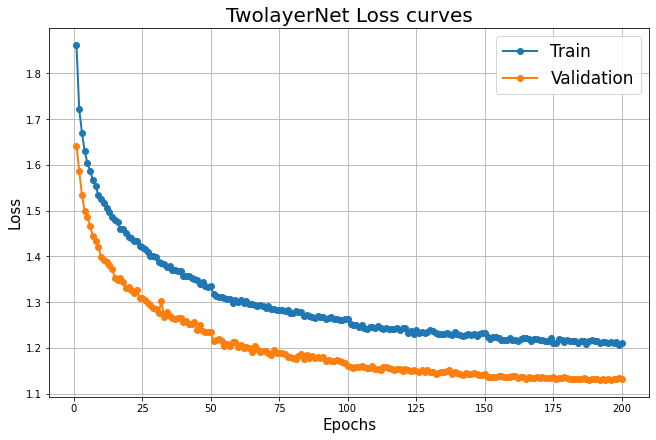

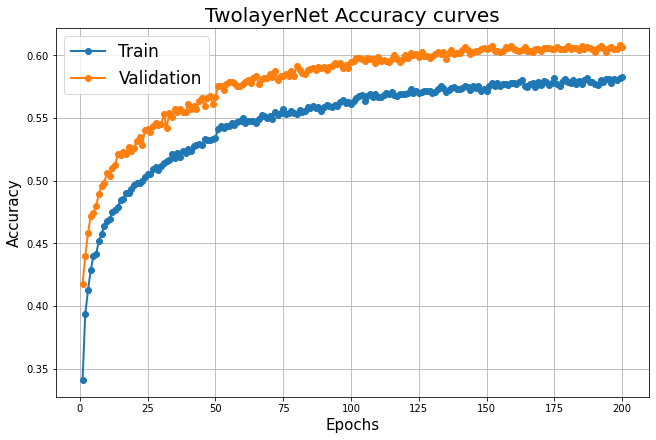

In [5]:
train_transforms = [
    {
        "name": "ToTensor",
        "args": {},
    },
    {
        "name": "Normalize",
        "args": {"mean": (0.5, 0.5, 0.5), "std": (0.5, 0.5, 0.5)},
    },
    {
        "name": "RandomAffine",
        "args": {"degrees": 10, "translate": (0.1, 0.1), "scale": (0.8, 1.2)},
    },
    {
        "name": "RandomHorizontalFlip",
        "args": {"p": 0.5},
    },
    {
        "name": "GaussianBlur",
        "args": {"kernel_size": 3},
    },
]
valid_transforms = [
    {
        "name": "ToTensor",
        "args": {},
    },
    {
        "name": "Normalize",
        "args": {"mean": (0.5, 0.5, 0.5), "std": (0.5, 0.5, 0.5)},
    },
]

network = "tln"
num_epochs = 200
batch_size = 128
opt_args = {"name": "Adam", "lr": 1e-4}
sch_args = {"name": "MultiStepLR", "milestones": [50, 100, 150], "gamma": 0.5}

net, loss_fn = experiment(
    train_transforms, valid_transforms, network, num_epochs, batch_size, opt_args, sch_args=sch_args,
)

In [6]:
summary(net, input_size=(3 * 32 * 32,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]       1,573,376
              ReLU-2                  [-1, 512]               0
            Linear-3                   [-1, 10]           5,130
Total params: 1,578,506
Trainable params: 1,578,506
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.01
Params size (MB): 6.02
Estimated Total Size (MB): 6.04
----------------------------------------------------------------


In [7]:
test_transforms = [
    {
        "name": "ToTensor",
        "args": {},
    },
    {
        "name": "Normalize",
        "args": {"mean": (0.5, 0.5, 0.5), "std": (0.5, 0.5, 0.5)},
    },
]
test_transform = InputTransform(test_transforms)
test_dataset = CIFAR(root="../datasets/CIFAR-10/", mode="test", transform=test_transform)
test_loader = get_dataloader(test_dataset, train=False, batch_size=128, num_workers=0)

In [8]:
evaluate(net, test_loader, loss_fn, 1, 1, "test")

Evaluate: Epoch [1/1]: 100%|██████████████████████████████| 79/79 [00:00<00:00, 205.77it/s]                                                

TEST 	: Summary: Loss: 1.1413 Accuracy: 0.6026


(1.1413381009162227, 0.6026)

In [9]:
torch.save(net, "../checkpoints/tln_best_hparams.pt")